In [1]:
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from postladim import ParticleFile

In [2]:
import os

In [3]:
pf = ParticleFile('line.nc')
f = Dataset('../data/ocean_avg_0014.nc')

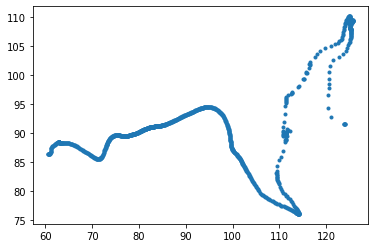

In [4]:
# Simple plot all particles time step 80

X, Y = pf.position(80)
plt.plot(X, Y, '.')


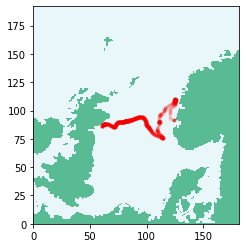

In [5]:
# Add land
X, Y = pf.position(80)

M = f.variables['mask_rho'][:, :] # = 1 at sea, = 0 on land
# Use vmin/vmax to dampen the land colour
plt.pcolormesh(M, cmap='BuGn_r', vmin=-1, vmax=1.2)
plt.plot(X, Y, marker='.', color='red', alpha=0.1)
 # Get correct aspect ratio
plt.axis('image');

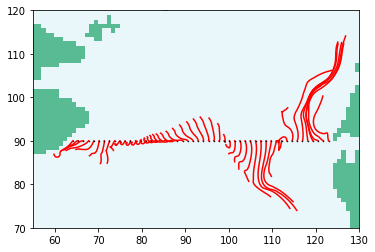

In [6]:
# Plot some trajectories
trajs = []
for pid in range(10, 1000, 20):
    trajs.append(pf.trajectory(pid))

M = f.variables['mask_rho'][:, :] # = 1 at sea, = 0 on land
plt.pcolormesh(M, cmap='BuGn_r', vmin=-1, vmax=1.2)
for traj in trajs:
    # plt.plot(traj.X, traj.Y, 'r.', markersize=1)
    plt.plot(traj.X, traj.Y, 'r')
    plt.plot(traj.X[0], traj.Y[0], 'k.', markersize=1)
plt.axis('image')
# zoom
plt.axis((55, 130, 70, 120));